# [ELMo(Embedding from Language Model)](https://yngie-c.github.io/nlp/2020/07/03/nlp_elmo/)
- 언어 모델을 이용해 임베딩 수행
- word2vec과 달리 임베딩 벡터가 가변적(학습된 벡터를 가져와 주어진 문장에 맞게 가변적 임베딩 벡터 생성)
- 같은 단어라 하더라도 **문맥에 맞는 여러 의미로 표현 가능 (동음이의어 표현 가능)** 
<br/>

- 사전학습된(pre-trained) **bi-LSTM**을 사용해 임베딩 수행
- bi-LSTM은 앞 단어가 뒤에 미치는 영향 + 뒤 단어가 앞에 미치는 영향도 학습 <br/> <br/>

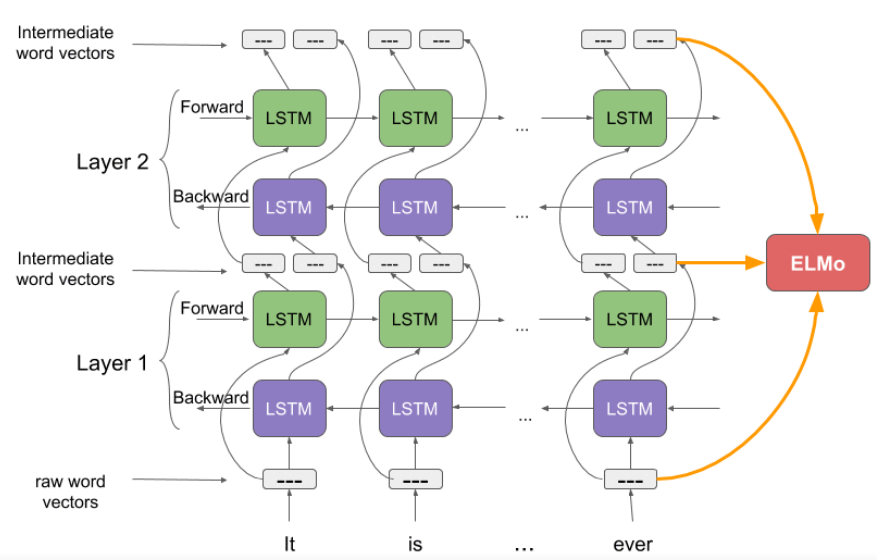
<br/> <br/>

## ELMo 임베딩 벡터 생성 과정
1. 문장의 단어들을 벡터로 변환한 임베딩 벡터가 Layer1의 양방향 LSTM층의 입력
2. 동일한 임베딩 벡터가 각각 정방향 LSTM, 역방향 LSTM에 입력으로 들어가 출력을 만듦
3. 이 두 출력을 합쳐 Layer1의 출력이 됨
4. Layer1의 출력이 Layer2의 양방향 LSTM의 입력으로 들어갈 때는 정뱡항과 역방향이 나눠 입력으로 사용
   -> 즉, 정방향과 역방향은 독립적으로 학습됨
5. 모형의 각 층 정방향, 역방향 출력을 이어붙여서(concatenate) 하나의 벡터로 만듦
6. 각 층의 벡터에 가중치를 곱함
7. 입력층을 포함한 모든 층의 결과를 더해 최종 임베딩 벡터를 만듦
<br/> <br/> <br/>

# Doc2Vec
- 문서에 대해 임베딩
- BOW 방식의 카운트 벡터, TF-IDF 벡터와 유사 But, 단어의 순서를 고려한 **문맥 정보가 임베딩 벡터에 포함**된다는 점이 차이
- word2vec과 차이점: 문서의 ID를 학습 과정에 포함시킴. 문서 ID는 해당 문서에서 나온 학습 입력집합에 모두 포함됨
<br/>

- DM(Distributed Memory)와 DBOW(Distributed Bag of Words)
<br/> <br/>
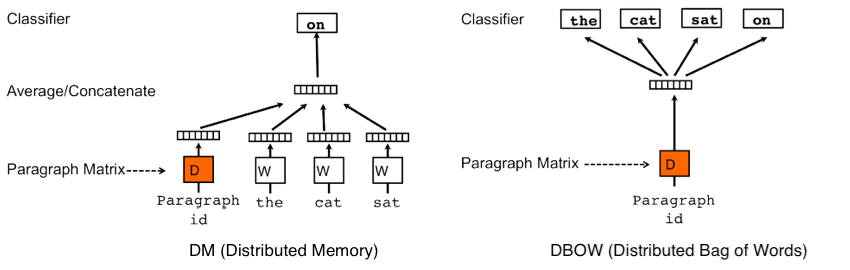

### DM(Distributed Memory)
- word2vec의 CBOW(Continuous Bag of Words)에 문서 ID를 추가한 형태
- 앞의 단어들 + 문서 ID로 다음 단어를 예측
<br/> <br/>

### DBOW(Distributed Bag of Words)
- word2vec의 skip-gram에 문서 ID를 추가한 형태
- 문서 ID로 일련의 단어들을 예측

In [11]:
# doc2vec 사용해보기

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

print(type(common_texts))  # 타입
print(len(common_texts))   # 크기
print(common_texts)

<class 'list'>
9
[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [12]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)    # 윈도우: 2, 앞 뒤 2개 단어로 예측

In [13]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  

In [23]:
vector = model.infer_vector(["system", "response"])
vector2 = model.infer_vector(["human", "eps"])

print(vector)
print(vector2)

[-0.0181281  -0.0539258  -0.03593018 -0.08095627  0.02207687]
[-0.09038427 -0.01770012  0.00076698  0.00522486 -0.02737375]
